In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
os.listdir()

In [2]:
review_df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [ ]:
review_df.head()

In [ ]:
review_df.info()

In [ ]:
# Vemos que la mayría de las personas pone una puntuación muy alta al producto

review_df.describe()

## Análisis exploratorio

In [ ]:
# Con un mapa de calor vemos si hay reviews nulas

sns.heatmap(review_df.isnull(), yticklabels=False, cmap = 'Blues')

# Vemos que no hay ningún valor nulo

In [ ]:
review_df.hist(bins = 30)
plt.show()

# Aquí ya vemos que tenemos un dataset bastante desbalanceado

In [ ]:
review_df.columns

In [3]:
# Ahora crearé una nueva columna en el data set con el número de letras que tiene cada review

review_df['longitud'] = review_df.loc[:,'verified_reviews'].apply(len)
review_df.head()

,rating,date,variation,verified_reviews,feedback,longitud
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
''''Cuando se estudia con variables que han escrito humanos, la distribución suele ser una long tail. Con este gráfico
lo corroboramos''''

plt.hist(review_df.loc[:,'longitud'], bins = 30)
plt.show()

In [ ]:
review_df.loc[:,'longitud'].describe()

In [ ]:
# Comentario más corto

review_df.loc[review_df['longitud']==1,'verified_reviews'].iloc[0]

In [ ]:
# Comentario más largo

review_df.loc[review_df['longitud']==2851,'verified_reviews'].iloc[0]

In [ ]:
# Comentarios con longitud de la media

review_df.loc[review_df['longitud']==132,:]

In [4]:
# Separo el data set en postivos y negativos con la ayuda de la columna feedback

positivo = review_df.loc[review_df['feedback'] == 1,:]
negativo = review_df.loc[review_df['feedback'] == 0,:]

In [ ]:
# Esto es un ejemplo del problema desbalanceado que tenemos

sns.countplot(data = review_df,
             x = 'feedback')
plt.show()

In [ ]:
sns.countplot(data = review_df,
             x = 'rating')

In [ ]:
# Aquí vemos si depende del diseño del aparato cambia la puntuación de los usuarios

plt.figure(figsize=(30,10))
sns.barplot(x = 'variation',
           y = 'rating',
           data = review_df)

plt.show()

In [5]:
# Junto todas las reviews en una lista

frases = review_df.loc[:,'verified_reviews'].tolist()

In [6]:
# Ahora junto todo en una frase gigante

una_frase = ' '.join(frases)

### Nube de palabras

In [5]:
from wordcloud import WordCloud

In [ ]:
''' Esta es una gráfica que nos acerca a lo que nuestros clientes están diciendo, apareciendo en un tamaño
mayor aquellas palabras que se usan con más frecuencia. Vemos que las palabras que aparecen tienen connotaciones
positivas'''

plt.figure(figsize = (20,20))

plt.imshow(WordCloud().generate(una_frase))

In [6]:
# Esta es una nube de palabras con el dataframe con los comentarios negativos

frase_neg = negativo.loc[:,'verified_reviews'].tolist()
una_frase_neg = ' '.join(frase_neg)

In [ ]:
plt.figure(figsize = (15,15))

plt.imshow(WordCloud().generate(una_frase_neg))
plt.show()

# Limpieza del texto

In [5]:
# Me voy a quedar con las columnas que me van a servir para mi modelo

df = review_df.drop(['date', 'rating', 'longitud'], axis = 1)

In [6]:
# Hago dummi la variable que indica el tipo de aparato.
# drop_first = true quita una de las columnas de dumies para evitar la colinealidad

dumies = pd.get_dummies(df.loc[:,'variation'], drop_first=True)

In [7]:
# concateno los 2 dataframe

df.drop('variation', axis = 1, inplace = True)

df = pd.concat([df, dumies], axis = 1)

# Eliminar los signos de puntuación

In [8]:
import string
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nestor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def limpiar_frase(frase):
    
    limpiar_puntuacion = [i for i in frase if i not in string.punctuation]
    limpiar_puntuacion = ''.join(limpiar_puntuacion)
    frase_limpia = [i for i in limpiar_puntuacion.split() if i.lower() not in stopwords.words('english')]
    
    return frase_limpia

In [29]:
# Con este ejemplo veo que la función está bien
frase = 'Here is a minichallenge, that will teach you how to remove stopwords an punctuation?!!!'
limpiar_frase(frase)

In [11]:
# En df_clean ya tengo las valoraciones limpias, sin signos ni stopwords

df_clean = df.loc[:,'verified_reviews'].apply(limpiar_frase)

# Tokenizar

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# El parámetro analyzer del CountVectorizer me permite llamar a la función y evitarme el paso anterior.

vectorizar = CountVectorizer(analyzer=limpiar_frase)
df_tokenizado = vectorizar.fit_transform(df.loc[:,'verified_reviews'])

In [14]:
# Array de los tokens

df_tokenizado.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
df_tokenizado.shape

(3150, 5211)

In [15]:
# Añado este array al dataframe

df.drop(['verified_reviews'], axis = 1, inplace = True)
reviews = pd.DataFrame(df_tokenizado.toarray())
df = pd.concat([df, reviews], axis = 1)

In [16]:
df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Separo mis variables independientes con mi variable a predecir(y)

x = df.drop(['feedback'], axis = 1)
y = df.loc[:,'feedback']

# Naive Bayes

In [19]:
((20/60)*(3/20))/(4/60)

0.75

In [31]:
# Separamos el dataset para entrenar y testear y evitar el overfiting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
# Entrenamos el modelo Naive Bayes

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

# Validación del Modelo

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

<AxesSubplot:>

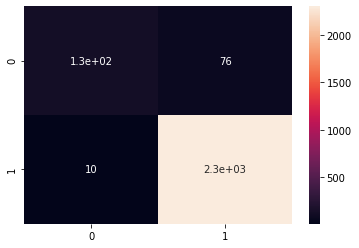

In [24]:
# En esta primera matriz de confusión vemos que mi modelo se ha equivocado en clasificar 78 y 3 comentarios.
# 3 valoraciones negativas las ha marcado como positivas y 78 como positivas las ha marcado como negativas

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [28]:
# Ahora voy a entrenar el modelo y comparar con mi y_test para evitar overfiting

clf = MultinomialNB()
clf.fit(x_train, y_train)

NameError: name 'MultinomialNB' is not defined

<AxesSubplot:>

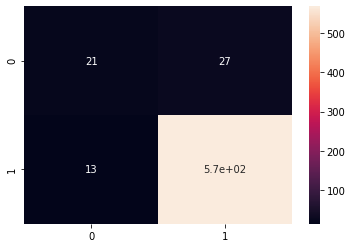

In [26]:
y_pred = clf.predict(x_test)

# Matriz de confusión

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [27]:
print(classification_report(y_test, y_pred))

'''Con este cuadro vemos uno de los problemas del data set y por qué falla tanto cuando intenta clasificar los
comentarios negativos. El problema es el desbalanceo de clases. Esto hace que el método de Naibe Bayes obtenga
una mayor probabilidad a priori de pertenecer al grupo de los comentarios positivos que de los negativos. Recordemos
que la fórmula para este algoritmo, incluye la probabilidad a priori para obtener la a posteriori.
Antes de hacer balanceo de clases, vamos a probar con una regresión logística, a ver que obtenemos, y, finalmente,
haremos balanceo de clases y volveremos a intentar el Naive Bayes.'''

              precision    recall  f1-score   support

           0       0.62      0.44      0.51        48
           1       0.95      0.98      0.97       582

    accuracy                           0.94       630
   macro avg       0.79      0.71      0.74       630
weighted avg       0.93      0.94      0.93       630



'Con este cuadro vemos uno de los problemas del data set y por qué falla tanto cuando intenta clasificar los\ncomentarios negativos. El problema es el desbalanceo de clases. Esto hace que el método de Naibe Bayes obtenga\nuna mayor probabilidad a priori de pertenecer al grupo de los comentarios positivos que de los negativos. Recordemos\nque la fórmula para este algoritmo, incluye la probabilidad a priori para obtener la a posteriori.\nAntes de hacer balanceo de clases, vamos a probar con una regresión logística, a ver que obtenemos, y, finalmente,\nharemos balanceo de clases y volveremos a intentar el Naive Bayes.'

# Regresión logística

In [40]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.31      0.45        48
           1       0.95      0.99      0.97       582

    accuracy                           0.94       630
   macro avg       0.87      0.65      0.71       630
weighted avg       0.93      0.94      0.93       630



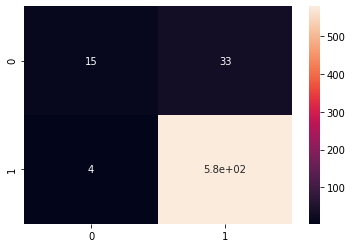

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print(classification_report(y_test, y_pred))

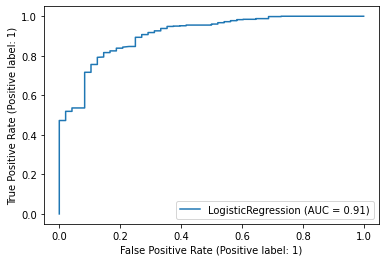

In [35]:
from sklearn.metrics import accuracy_score, plot_roc_curve

plot_roc_curve(clf, x_test, y_test)

# Balanceo de clases

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
over = SMOTE(sampling_strategy=0.8) #Queremos un 80% del tamaño de la clase mayoritaria en la minoritaria
x_bal, y_bal = over.fit_resample(x,y)

In [34]:
x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(x_bal, y_bal, test_size=0.3)

In [33]:
# Aquí vemos que las clases ya están algo más balanceadas

from collections import Counter
print('datos balanceados =',Counter(y_bal))
print('datos desbalanceados =',Counter(y_train))

datos balanceados = Counter({1: 2893, 0: 2314})
datos desbalanceados = Counter({1: 2318, 0: 202})


# Naive Bayes balanceado

In [35]:
# Repetimos el algoritmo de Naive Bayes

clf = MultinomialNB()
clf.fit(x_bal_train, y_bal_train)

MultinomialNB()

<AxesSubplot:>

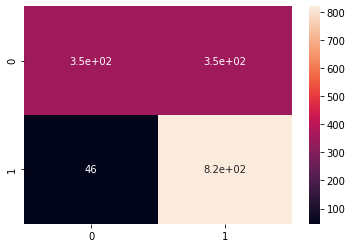

In [37]:
y_pred_bal = clf.predict(x_bal_test)

sns.heatmap(confusion_matrix(y_bal_test, y_pred_bal), annot=True)

In [38]:
'''Vemos que, aunque en la matriz de confusión falle la mitad lo mismo que acierta al clasifica comentarios
negativos, este empieza a ser un mejor modelo. En este caso habría que ir ajustano los parámetros del algoritmo
y el preprocesamiento para ir consiguiendo mejores validaciones. Sin embargo, vemos como el classification_report
indica mejoras en muchos de los indicadores, como el recall en de los comentarios negaticos o el f1-score.'''

print(classification_report(y_bal_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64       698
           1       0.70      0.95      0.81       865

    accuracy                           0.75      1563
   macro avg       0.79      0.72      0.72      1563
weighted avg       0.78      0.75      0.73      1563



# Regresión logística balanceada

In [41]:
clf = LogisticRegression()
clf.fit(x_bal_train, y_bal_train)
y_pred = clf.predict(x_bal_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       698
           1       0.97      0.91      0.94       865

    accuracy                           0.94      1563
   macro avg       0.93      0.94      0.94      1563
weighted avg       0.94      0.94      0.94      1563



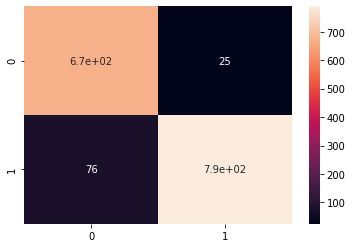

In [42]:
'''Aquí vemos un mejor modelo con diferencia. Vemos que todos los indicadores están por encima del 0.9, algo 
muy positivo ya que indican que tanto al clasificar los comentarios positivos y los negativos aciertan bastante
y fallan poco. En concreto, con los datos de test, vemos que fallan 25 comentarios negativos y acierta 672 y al
clasificar los positivos falla en 76 comentarios pero acierta en clasificar 792. Esto, aunque para este problema
puede ser aceptable, se puede mejorar mucho más. La menra de mejorarlo sería aplicando distintos métodos de 
validación, probando más modelos y con la ayuda de un gridsearch de python, que nos permite probar modelos ajustando
los parámetros, algo muy útil ya que, en este ejercicio, se han dejado los parámetros que tiene el algoritmo por
defecto.
Esa produndidad de análisis lo haré más adelante y lo iré subiendo a este repositorio.'''

sns.heatmap(confusion_matrix(y_bal_test, y_pred), annot = True)
print(classification_report(y_bal_test, y_pred))